In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  

In [4]:
# Dependencies
import tweepy
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
from datetime import datetime

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# reference target accounts and pull in the last 100 tweets for each
# pull in source account, text, and date
target_accounts = ("@BBC", "@CBS", "@CNN",
                    "@FoxNews", "@nytimes")

#create arrays for text and date
tweet_text = []
tweet_dates = []
user = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# loop through the accounts
for target in target_accounts:
    

    #100 tweets per user account
    for x in range(5):
    
        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, result_type="recent", page=x)
        
        
        # Loop through the tweets
        for tweet in public_tweets:

            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Append results to the arrays
            tweet_text.append(tweet["text"])
            tweet_dates.append(tweet["created_at"])
            user.append(target)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            

In [6]:
# Convert tweet timestamps to datetime objects
converted_timestamps = []
for tweet_date in tweet_dates:
    converted_time = datetime.strptime(tweet_date, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
print(converted_timestamps)

print(len(converted_timestamps))

[datetime.datetime(2018, 3, 15, 17, 30, 5, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 13, 52, 24, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 13, 0, 5, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 12, 0, 16, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 10, 45, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 10, 26, 48, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 9, 53, 48, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 9, 53, 11, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 9, 50, 25, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 9, 0, 8, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 8, 30, 8, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 15, 8, 0, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 14, 21, 14, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 14, 20, 0, 3, tzinfo=datetime.

In [7]:
# Create dataframe
tweets_df = pd.DataFrame({"Account":user,
                          "Text":tweet_text,
                          "Date":converted_timestamps,
                          "Compound":compound_list,
                          "Positive":positive_list,
                          "Negative":negative_list,
                          "Neutral":neutral_list
                         })

tweets_df = tweets_df[['Account', 'Date', 'Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
tweets_df.head()

,Account,Date,Text,Compound,Positive,Neutral,Negative
0,@BBC,2018-03-15 17:30:05+00:00,🎨🖼️ Meet the amazing 84-year-old who’s never h...,0.3400,0.118,0.882,0.000
1,@BBC,2018-03-15 13:52:24+00:00,RT @BBCR1: .@CHVRCHES covering @The1975's 'Som...,0.5214,0.194,0.806,0.000
2,@BBC,2018-03-15 13:00:05+00:00,"Tiny cookery. It's like regular cookery, but s...",0.1901,0.179,0.821,0.000
3,@BBC,2018-03-15 12:00:16+00:00,🚢🎞 Stars of the silver screen all at sea. \n📸👉...,0.0000,0.000,1.000,0.000
4,@BBC,2018-03-15 10:45:00+00:00,BBC Economics Editor @bbckamal travels back to...,-0.4767,0.000,0.866,0.134


In [8]:
# Export the dataframe to a csv
tweets_df.to_csv("CityData.csv", encoding='utf-8')

In [33]:
# Sort tweets by date

tweets_df = tweets_df.sort_values("Date", ascending=False)
tweets_df

,Account,Date,Text,Compound,Positive,Neutral,Negative
300,@FoxNews,2018-03-15 18:20:13+00:00,New Video Shows FL Officer Standing Outside Hi...,0.0000,0.000,1.000,0.000
320,@FoxNews,2018-03-15 18:20:13+00:00,New Video Shows FL Officer Standing Outside Hi...,0.0000,0.000,1.000,0.000
301,@FoxNews,2018-03-15 18:18:19+00:00,Resistance to Amazon's HQ2 creates strange pol...,0.0772,0.151,0.719,0.129
321,@FoxNews,2018-03-15 18:18:19+00:00,Resistance to Amazon's HQ2 creates strange pol...,0.0772,0.151,0.719,0.129
200,@CNN,2018-03-15 18:15:11+00:00,A top US military officer in Asia says he's no...,-0.0418,0.101,0.788,0.110
220,@CNN,2018-03-15 18:15:11+00:00,A top US military officer in Asia says he's no...,-0.0418,0.101,0.788,0.110
400,@nytimes,2018-03-15 18:14:51+00:00,"Under 2 minutes left, and Rhode Island leads 6...",0.0000,0.000,1.000,0.000
420,@nytimes,2018-03-15 18:14:51+00:00,"Under 2 minutes left, and Rhode Island leads 6...",0.0000,0.000,1.000,0.000
322,@FoxNews,2018-03-15 18:12:48+00:00,Parkland massacre sparks a wave of state-level...,-0.3400,0.000,0.789,0.211
302,@FoxNews,2018-03-15 18:12:48+00:00,Parkland massacre sparks a wave of state-level...,-0.3400,0.000,0.789,0.211


In [13]:
# create different dataframes for the accounts @BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes
bbc = tweets_df.loc[tweets_df["Account"] == "@BBC"]
cbs = tweets_df.loc[tweets_df["Account"] == "@CBS"]
cnn = tweets_df.loc[tweets_df["Account"] == "@CNN"]
fox = tweets_df.loc[tweets_df["Account"] == "@FoxNews"]
nytimes = tweets_df.loc[tweets_df["Account"] == "@nytimes"]


,Account,Date,Text,Compound,Positive,Neutral,Negative
200,@CNN,2018-03-15 18:15:11+00:00,A top US military officer in Asia says he's no...,-0.0418,0.101,0.788,0.110
201,@CNN,2018-03-15 18:07:52+00:00,JUST IN: Special counsel Robert Mueller has su...,0.4019,0.144,0.856,0.000
202,@CNN,2018-03-15 18:05:05+00:00,Looking to buy a toy for your kids? You'll pro...,0.4939,0.181,0.819,0.000
203,@CNN,2018-03-15 17:56:46+00:00,Security camera footage from outside of Marjor...,0.3400,0.118,0.882,0.000
204,@CNN,2018-03-15 17:55:08+00:00,For decades the state song of Maryland has bee...,0.0000,0.000,1.000,0.000
205,@CNN,2018-03-15 17:43:05+00:00,Democratic Sen. Heidi Heitkamp on when Hillary...,0.0000,0.000,1.000,0.000
206,@CNN,2018-03-15 17:33:44+00:00,Former FBI Deputy Director Andrew McCabe is cu...,0.5267,0.159,0.841,0.000
207,@CNN,2018-03-15 17:12:06+00:00,Trump's fib to Justin Trudeau is totally predi...,-0.4939,0.000,0.824,0.176
208,@CNN,2018-03-15 17:02:57+00:00,Republican Sen. John Kennedy and Democratic Se...,0.0000,0.000,1.000,0.000
209,@CNN,2018-03-15 16:50:04+00:00,"Stormy Daniels' mother: ""If Mr. Trump runs fou...",0.0000,0.000,1.000,0.000


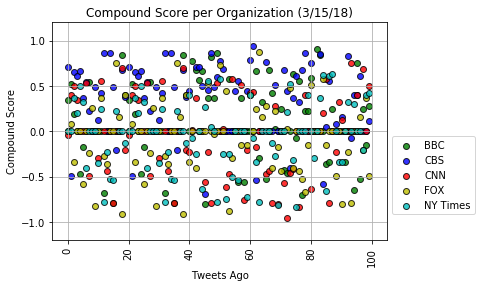

In [35]:
# Build a scatter plot compound scores for all of the tweets
plt.scatter(range(len(bbc["Date"].values)),
            bbc["Compound"],
            edgecolor="black", color='g', marker="o",
            alpha=0.8, label="BBC")
plt.scatter(range(len(cbs["Date"].values)),
            cbs["Compound"],
            edgecolor="black", color='b', marker="o",
            alpha=0.8, label="CBS")
plt.scatter(range(len(cnn["Date"].values)),
            cnn["Compound"],
            edgecolor="black", color='r', marker="o",
            alpha=0.8, label="CNN")
plt.scatter(range(len(fox["Date"].values)),
            fox["Compound"],
            edgecolor="black", color='y', marker="o",
            alpha=0.8, label="FOX")
plt.scatter(range(len(nytimes["Date"].values)),
            nytimes["Compound"],
            edgecolor="black", color='c', marker="o",
            alpha=0.8, label="NY Times")

# Incorporate the other graph properties
plt.title("Compound Score per Organization (3/15/18)")
plt.ylabel("Compound Score")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xticks(rotation="vertical")
plt.grid(True)
plt.xlim(-5,105)
plt.ylim([-1.2, 1.2])

# Save the figure
plt.savefig("Compound.png")

# Show plot
plt.show()

In [26]:
# create a bar plot visualizing the overall sentiments of the last 100 tweets from each account
mean_bbc = bbc["Compound"].mean()
mean_cbs = cbs["Compound"].mean()
mean_cnn = cnn["Compound"].mean()
mean_fox = fox["Compound"].mean()
mean_nytimes = nytimes["Compound"].mean()
print(f"The mean of bbc is {mean_bbc}, cbs is {mean_cbs}, cnn is {mean_cnn}, fox is {mean_fox}, ny times is {mean_nytimes}.")

The mean of bbc is 0.08504399999999998, cbs is 0.31866599999999995, cnn is -0.028849999999999983, fox is -0.057377000000000004, ny times is -0.05304899999999999.


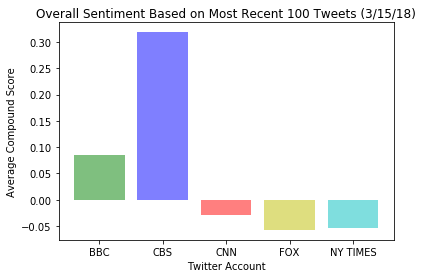

In [34]:
# create a bar plot visualizing the overall sentiments of the last 100 tweets from each account
x_axis = np.arange(len(tweets_df["Account"].unique()))
values = [mean_bbc, mean_cbs, mean_cnn, mean_fox, mean_nytimes]
colors = ['g', 'b', 'r', 'y', 'c']

plt.bar(x_axis, values, align='edge', alpha=.5, color=colors)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NY TIMES"])
plt.title("Overall Sentiment Based on Most Recent 100 Tweets (3/15/18)")
plt.xlabel("Twitter Account")
plt.ylabel("Average Compound Score")

# Save the figure
plt.savefig("Compound_bar.png")

plt.show()

## Trends

1. The results will clearly vary depending on what's going on in the world, but CBS has much more positive tweets right now. One of the big reasons may be due to their coverage of March Madness. They're much more likely to talk about college basketball than the New York Times or CNN.
2. I thought it was interesting that the BBC is the only non-US based account and it's much more positive than CNN, Fox, and the New York Times. 
3. Seems like accounts that cover stricly news and/or politics are generally more negative. BBC and CBS both cover a wider range of things like entertainment and sports which are generally happier topics, and their sentiment analysis reflects that.

